<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Assignment2/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting - Univariate without Exogenous Variables**

In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0

In [ ]:
import pandas as pd


data = pd.read_csv('/content/Timeseries1-AirPassengers.csv')


print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
from pycaret.time_series import *


s = setup(data, target="#Passengers")


,Description,Value
0,session_id,1891
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(144, 2)"
5,Transformed data shape,"(144, 2)"
6,Transformed train set shape,"(143, 2)"
7,Transformed test set shape,"(1, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_model = compare_models(sort="MAPE")


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
stlf,STLF,0.2793,0.2460,8.9481,8.9481,0.0217,0.0213,0.0567
snaive,Seasonal Naive Forecaster,1.3258,1.1670,42.3333,42.3333,0.0925,0.0972,0.0667
croston,Croston,1.3802,1.2153,44.1736,44.1736,0.1039,0.0983,0.0200
naive,Naive Forecaster,2.2543,1.9842,72.0000,72.0000,0.1590,0.1466,1.2667
grand_means,Grand Means Forecaster,5.5122,4.8516,175.9549,175.9549,0.3808,0.4751,0.0333


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

**Forecast**

In [ ]:
final_model = finalize_model(best_model)




**Time Series Forecasting - Univariate with Exogenous Variables**

In [ ]:
data = pd.read_csv('/content/Timeseries_gemini_LTCUSD_2020_1min.csv')

In [ ]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,4/20/2021 0:03,LTCUSD,260.05,260.05,259.00,259.00,179.16470
1,1.618880e+12,4/20/2021 0:02,LTCUSD,262.77,262.86,260.00,260.05,307.77795
2,1.618880e+12,4/20/2021 0:01,LTCUSD,263.57,264.14,262.77,262.77,11.53982
3,1.618880e+12,4/20/2021 0:00,LTCUSD,261.32,263.76,261.32,263.57,110.88182
4,1.618880e+12,4/19/2021 23:59,LTCUSD,261.87,261.87,261.21,261.32,48.58221


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# data.drop('Symbol',axis=1,inplace=True)

data["Symbol"] = data["Symbol"].astype("string")

In [ ]:
data.dtypes

Unix Timestamp           float64
Date              datetime64[ns]
Symbol                    string
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
dtype: object

In [ ]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,2021-04-20 00:03:00,LTCUSD,260.05,260.05,259.00,259.00,179.16470
1,1.618880e+12,2021-04-20 00:02:00,LTCUSD,262.77,262.86,260.00,260.05,307.77795
2,1.618880e+12,2021-04-20 00:01:00,LTCUSD,263.57,264.14,262.77,262.77,11.53982
3,1.618880e+12,2021-04-20 00:00:00,LTCUSD,261.32,263.76,261.32,263.57,110.88182
4,1.618880e+12,2021-04-19 23:59:00,LTCUSD,261.87,261.87,261.21,261.32,48.58221


In [ ]:
eda = TSForecastingExperiment()

In [ ]:
eda.setup(
    data=data,
    target="Close",
    fh=48,
    numeric_imputation_target="ffill",
    numeric_imputation_exogenous="ffill",
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(658011, 8)"
5,Transformed data shape,"(658011, 8)"
6,Transformed train set shape,"(657963, 8)"
7,Transformed test set shape,"(48, 8)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


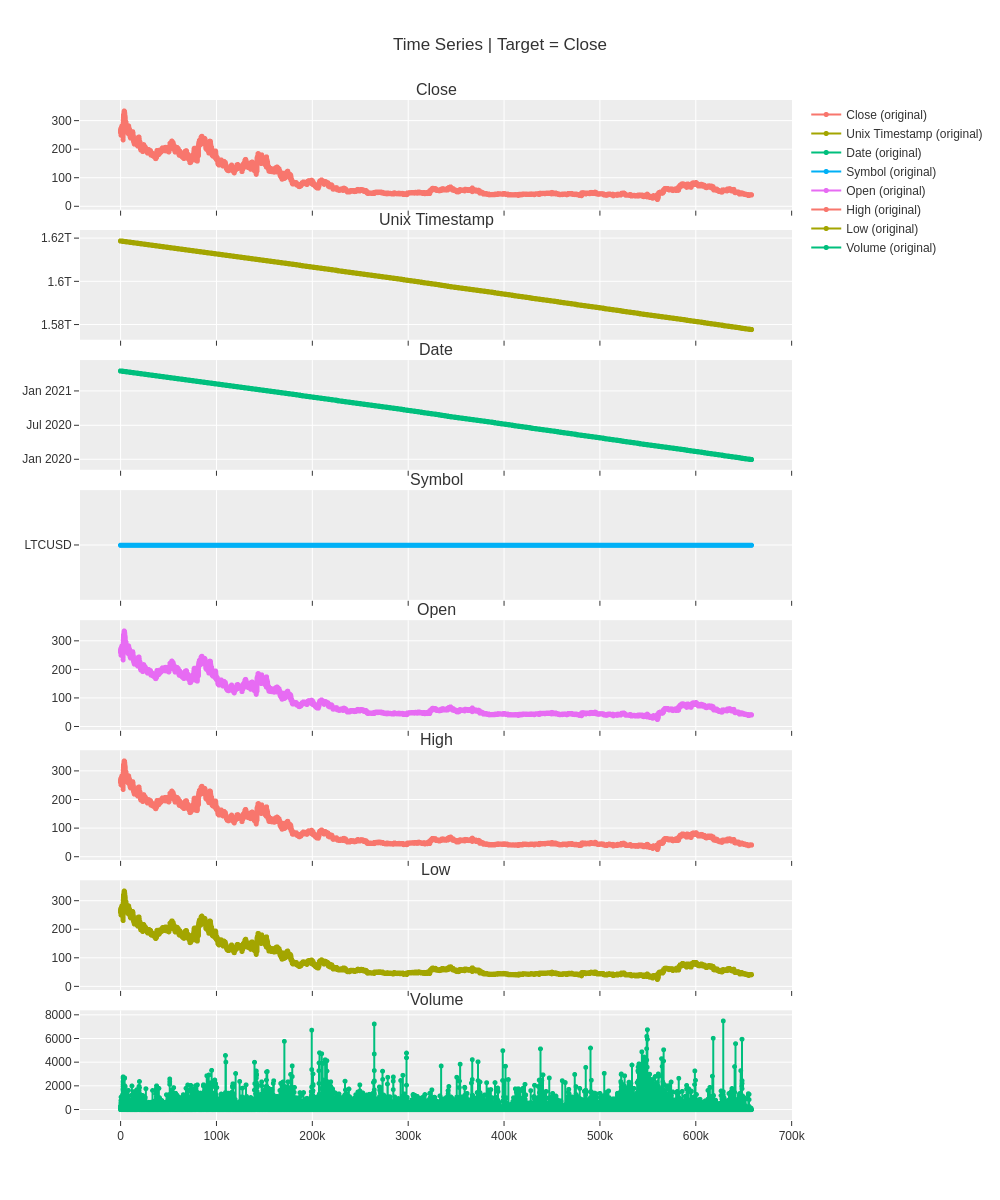

In [ ]:
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})